## Data Load

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("max_columns", 500)
from datetime import datetime, timedelta
from tqdm import tqdm
import numpy as np

In [4]:
permits = pd.read_csv("DOB_Permit_Issuance.csv")

/Users/Honors/anaconda/envs/nyc-construction-timelines/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,8,9,11,12,31,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
new_building_permits = pd.read_csv("new_building_permits.csv", index_col=0)

In [41]:
len(permits), len(new_building_permits), len(new_building_permits) / float(len(permits))

(556644, 6136, 0.01102320334001624)

## Quick Counts

Just getting a proportional count with respect to all permits issued.

In [12]:
(permits['Permit Type'] == 'NB').value_counts()

False    535402
True      21242
Name: Permit Type, dtype: int64

In [14]:
((permits['Permit Type'] == 'NB') & (permits['Job Type'] == 'NB')).value_counts()

False    535402
True      21242
dtype: int64

In [15]:
((permits['Permit Type'] == 'NB') & (permits['Job doc. #'] == 1.0)).value_counts()

False    535402
True      21242
dtype: int64

In [16]:
permits[permits['Permit Type'] == 'NB']['Permit Status'].value_counts()

ISSUED       20706
RE-ISSUED      536
Name: Permit Status, dtype: int64

In [18]:
((permits['Permit Type'] == 'NB') & (permits['Filing Status'] == 'INITIAL')).value_counts()

False    549711
True       6933
dtype: int64

In [20]:
permits[permits['Permit Type'] == 'NB']['Filing Status'].value_counts()

RENEWAL    14309
INITIAL     6933
Name: Filing Status, dtype: int64

## Aggregations

In [69]:
new_building_permits['Issuance Date'] = pd.to_datetime(new_building_permits['Issuance Date'])

Note that converting all 50-some thousand entries to datetime is a slow operation.

In [77]:
permits['Issuance Date'] = pd.to_datetime(permits['Issuance Date'])

First let's look at daily time-series for all permit issuance (time-series are more palatable than perhaps the more statistically interesting probability density functions).

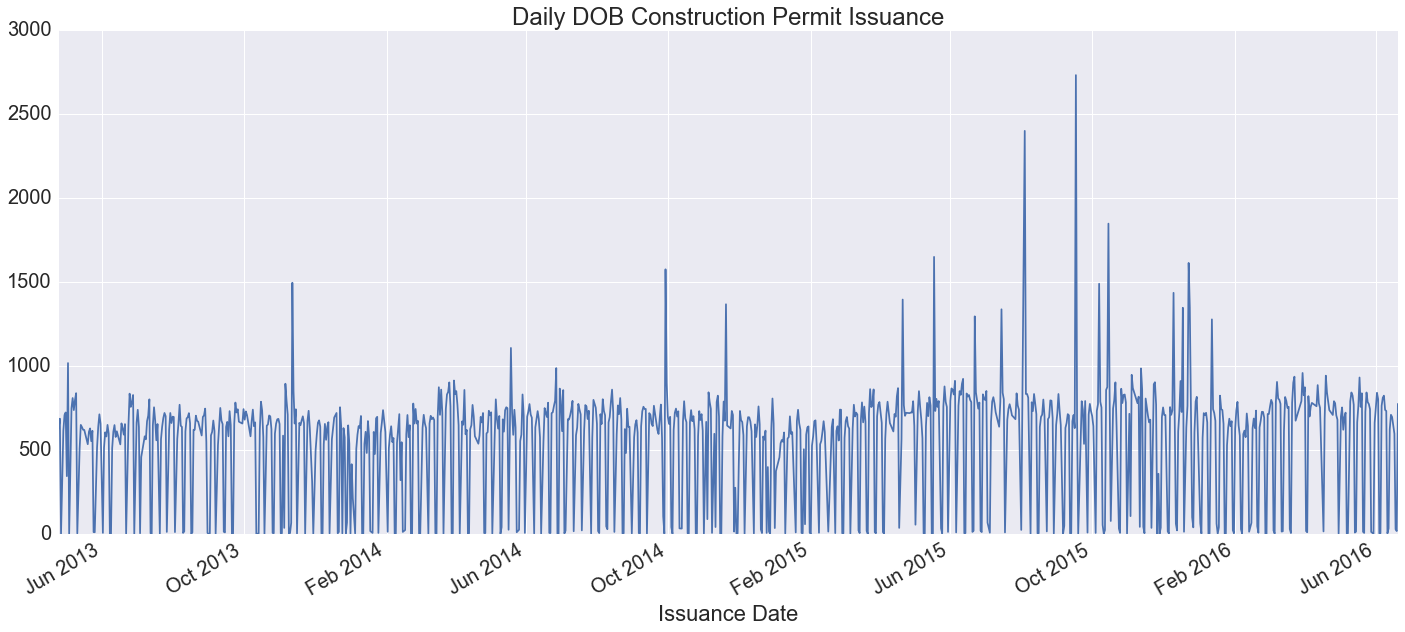

In [86]:
sns.set(font_scale=2)
permits.groupby(['Issuance Date'])['Issuance Date'].count().plot(figsize=(24, 10),
                                                                 title='Daily DOB Construction Permit Issuance')

In [87]:
sum(permits.groupby(['Issuance Date'])['Issuance Date'].count()) / len(permits.groupby(['Issuance Date'])['Issuance Date'].count())

544

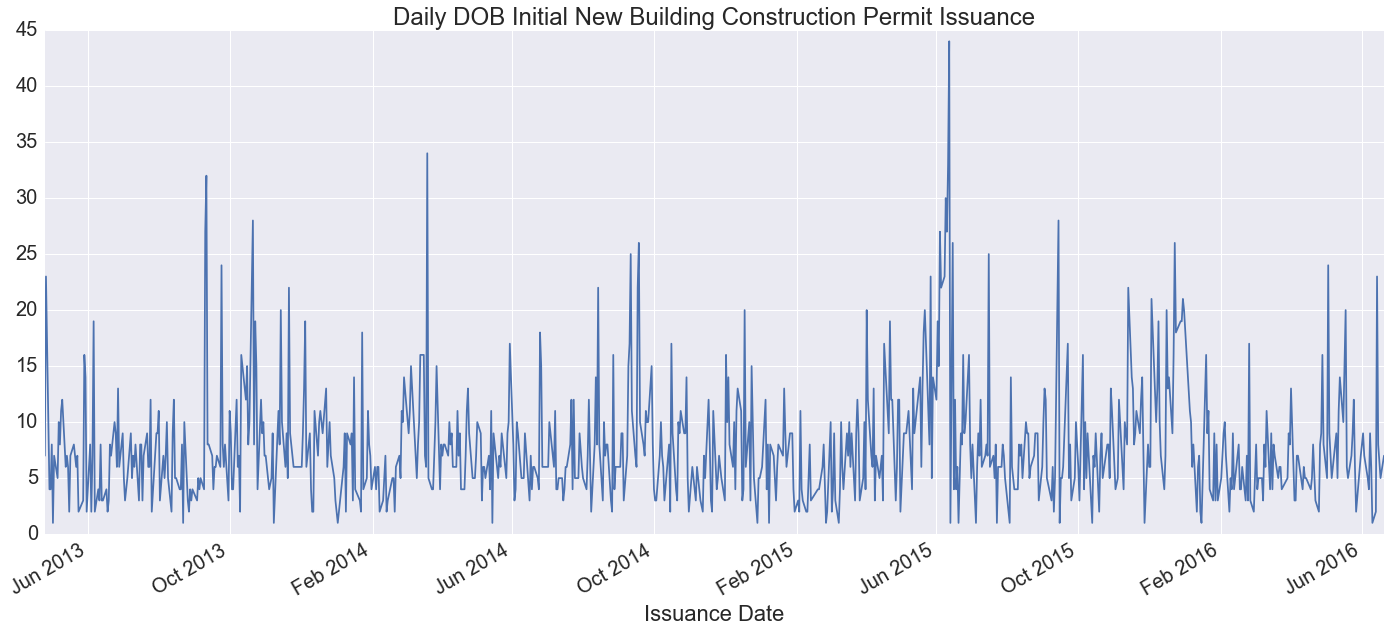

In [90]:
new_building_permits.groupby(['Issuance Date'])['Issuance Date'].count().plot(figsize=(24, 10),
                                                                 title='Daily DOB Initial New Building Construction Permit Issuance')